# Capstone Project Spotlight: Distinguishing AI-Generated fake News from Human Written Articles

### Team Name: AIK9s
### Team Members: Bill Park, Daphne He, Kacey Choi
- Github Repo: https://github.com/daphnehe/Capstone/tree/main
- Wix-website: https://b2park17.wixsite.com/aicheckmate

### Research Question:How effective are various machine learning models at differentiating between human-generated and AI-generated fake news, and which model provides the highest accuracy using our specific dataset?
### Contributions:
- Bill: Research on data sources,Compiled and find data, created the Wix website
- Daphne: Data cleaning/preprocessing
  - ML model testing
- Kaecy:
  - Step descriptions and explanations in Markdown
  - QQQ format

## Introduction
##### In an era where artificial intelligence (AI) has become adept at producing text that closely mimics human writing, the ability to accurately differentiate between content created by humans and that generated by machines is more crucial than ever. Our project centers on developing and comparing various machine learning models to effectively make this distinction, which is a fundamental step in addressing the broader challenge of Ai generated fake news detection.


### The spread of online misinformation poses a serious threat to democracies in the 21st century. It erodes trust in public institutions and increases political polarization, weakening the foundation that democratic systems are built upon.

### Initial Setup

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daphnehe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/daphnehe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/daphnehe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import json
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
# # Load the JSON data into a pandas DataFrame
# # Load Human real news
# with open('data/HR.json', 'r') as file:
#     data = json.load(file)

# HR_df = pd.DataFrame.from_dict(data, orient='index')

## Data sources
The type of data we needed was hard to find. Although there are lots of work conducted in the field of Ai text detection, most studies would just classify AI generated aritcles and text to be fake and misinformation.

We will be mainly using Data from the paper “Adapting Fake News Detection to the era of Large Language Models”, as they provide data in the 4 specific categories we needed to test and continue our project. The data set is divided in to Machine generate fake news(MF), Machine paraphrase real news(MR), Human generated Fake News(HF), and human generated Real News(HR).

Articles in the data set are News articles that were crawled and collected from Originally Gossipcop.com(entertainment source fact checking company)(which is now acquired by Suggest.com).

## Loading Data

### Purpose
##### We need to load our data, stored in JSON format, into a structured DataFrame. This process is essential as it converts raw data into a workable format, allowing for more efficient manipulation and analysis.

## Loading Data

### Purpose
##### We need to load our data, stored in JSON format, into a structured DataFrame. This process is essential as it converts raw data into a workable format, allowing for more efficient manipulation and analysis.

In [4]:
# Function to load JSON data into a DataFrame
def load_json_to_df(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return pd.DataFrame.from_dict(data, orient='index')

# List of JSON files
json_files = ['HR.json', 'HF.json', 'MR.json', 'MF.json']
dfs = []

# Load each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df = load_json_to_df('data/' + json_file)
    dfs.append(df)

# Naming the DataFrames
HR_df, HF_df, MR_df, MF_df = dfs

In [5]:
# Human Real News
HR_df

,id,text,title,description
0,gossipcop-951329,11 Summer Camp Movies That'll Make You Nostalg...,11 Summer Camp Movies That'll Make You Nostalg...,Nothing says summer like watching a movie all ...
1,gossipcop-861360,Info Category: Richest Business › Executives N...,Charrisse Jackson Jordan Net Worth,What is Charrisse Jackson Jordan's net worth?
2,gossipcop-911046,Warning: This story contains major spoilers fr...,Raúl Esparza exits Law & Order: SVU after six ...,The actor reveals why he decided to leave the ...
3,gossipcop-899120,Lil Peep died of an overdose of fentanyl and g...,Lil Peep Cause of Death Revealed,Pima County Office of the Medical Examiner con...
4,gossipcop-919455,Goop is kicking off its weekly podcast in a bi...,"Gwyneth Paltrow, Oprah talk Weinstein, #MeToo’...",Goop is kicking off its weekly podcast in a bi...
...,...,...,...,...
4148,gossipcop-926663,Blac Chyna must be a “Fifty Shades of Grey” fa...,Blac Chyna’s dream house includes a sex room,It would be a secret room only accessible from...
4149,gossipcop-897832,Following the Golden Globe nominations last we...,"LAFCA 2018 Winners: ‘Roma’ Takes Best Picture,...",Previous LAFCA winners for Best Film include “...
4150,gossipcop-853896,Bobby Moynihan came to TCA to talk about his n...,Bobby Moynihan: Leaving ‘Saturday Night Live’ ...,Bobby Moynihan came to TCA to talk about his n...
4151,gossipcop-944201,A patient seeking the help of reality TV surge...,Woman claims botched implant surgery left her ...,A patient seeking the help of reality-TV surge...


In [6]:
# Human Fake News
HF_df

,id,text,title,description
0,gossipcop-1991455469,✕ Close Meghan Markle and Prince Harry have an...,As it happened: Prince Harry and Meghan Markle...,The wedding will take place in spring 2018
1,gossipcop-7798039260,Kim Kardashian and Kanye West are pulling out ...,Kim & Kanye Install At-Home Panic Room After P...,'Keeping the kids safe is the couples number o...
2,gossipcop-7817725290,Prince Harry and Meghan currently live at Kens...,£1.4million spent renovating Prince Harry and ...,Prince Harry and Meghan might not be living in...
3,gossipcop-5111151830,They can't get enough of the Biebs on this sho...,Photos from Dancing With the Stars: Special Gu...,Photos from Dancing With the Stars: Special Gu...
4,gossipcop-9658632569,Ben Affleck is keeping life with his three kid...,Jennifer Garner ‘Doesn’t Want’ Her Kids Around...,Jennifer Garner ‘doesn’t want’ her three kids ...
...,...,...,...,...
4079,gossipcop-7065786957,There was no shortage of celebrity beefs in 20...,The Biggest Celebrity Feuds of 2017,There was no shortage of celebrity beefs in 2017.
4080,gossipcop-1188213997,Kim Kardashian and her sisters seem pretty uni...,Kim Kardashian Criticizes Scott Disick for Dat...,See what Kim said on 'KUWTK' inside!
4081,gossipcop-9024002184,"When John and I got together, I found my love ...",Chrissy Teigen Opens Up for the First Time Abo...,"""The mental pain of knowing I let so many peop..."
4082,gossipcop-3520745692,Yikes! Less than 3 months after giving birth t...,Kylie Jenner Suffers Pregnancy Scare 3 Months ...,Yikes! Less than 3 months after giving birth t...


In [7]:
# AI Real News
MR_df

,id,description,text,title
0,gossipcop-951329,Nothing says summer like watching a movie all ...,"With summer just around the corner, it's the p...",11 Summer Camp Movies That'll Make You Nostalg...
1,gossipcop-861360,What is Charrisse Jackson Jordan's net worth?,"Charrisse Jackson Jordan, an American reality ...",Charrisse Jackson Jordan Net Worth
2,gossipcop-911046,The actor reveals why he decided to leave the ...,Warning: This story contains major spoilers fr...,Raúl Esparza Exits Law & Order: SVU After Six ...
3,gossipcop-899120,Pima County Office of the Medical Examiner con...,The Pima County Office of the Medical Examiner...,Lil Peep's Cause of Death Revealed
4,gossipcop-919455,Goop is kicking off its weekly podcast in a bi...,Goop is kicking off its weekly podcast in a bi...,"Gwyneth Paltrow, Oprah Discuss Weinstein and #..."
...,...,...,...,...
4164,gossipcop-849360,Kailyn Lowry revealed she was recently 'hookin...,"Kailyn Lowry, star of Teen Mom 2, recently ope...",Kailyn Lowry Reveals Regrets About Relationshi...
4165,gossipcop-923609,"Farrah Abraham, one of the stars of the MTV sh...","Farrah Abraham, star of MTV's Teen Mom OG, has...",Farrah Abraham Drops $5 Million 'Sex Shaming' ...
4166,gossipcop-933361,Kim DePaola can't say enough good things about...,"The Real Housewives of New Jersey star, Kim De...","Real Housewives' Kim DePaola on Botched, Terry..."
4167,gossipcop-902565,See the red carpet looks (and Time's Up black ...,The 2018 Golden Globes red carpet is one unlik...,Black but not boring! See the red carpet looks...


In [8]:
# AI Fake News
MF_df

,id,text,title,description
0,gossipcop-1991455469,Excitement and anticipation are in the air as ...,Royal Family prepares to welcome modern bride ...,The wedding will take place in spring 2018
1,gossipcop-7798039260,In the wake of Kim Kardashian's traumatic Pari...,Kim and Kanye's At-Home Panic Room Sparks Outr...,'Keeping the kids safe is the couples number o...
2,gossipcop-7817725290,"uke and Duchess of Sussex, Prince Harry and Me...",£1.4 Million Renovation for Prince Harry and M...,Prince Harry and Meghan might not be living in...
3,gossipcop-5111151830,"In a surprise turn of events, former President...",Former President Obama and Beyoncé grace the D...,Photos from Dancing With the Stars: Special Gu...
4,gossipcop-9658632569,"In an unexpected turn of events, Hollywood act...",Jennifer Garner Caught Banning Lindsay Shookus...,Jennifer Garner ‘doesn’t want’ her three kids ...
...,...,...,...,...
4079,gossipcop-7065786957,As we bid farewell to the drama-filled year th...,The Most Anticipated Celebrity Feuds of 2018,There was no shortage of celebrity beefs in 2017.
4080,gossipcop-1188213997,Reality television star Kim Kardashian is faci...,Kim Kardashian Accused of Hypocrisy After Crit...,See what Kim said on 'KUWTK' inside!
4081,gossipcop-9024002184,"Chrissy Teigen, the popular model and social m...",Chrissy Teigen Reveals Secret Struggle with Po...,"""The mental pain of knowing I let so many peop..."
4082,gossipcop-3520745692,Kylie Jenner and Travis Scott's relationship m...,Kylie Jenner and Travis Scott's Relationship o...,Yikes! Less than 3 months after giving birth t...


## Data Cleaning

### Purpose
##### The raw text data often contains noise and irrelevant information. Cleaning the text by removing special characters and transforming all text to lowercase standardizes the input for further processing, ensuring consistency across data samples.


In [9]:
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

HR_df['cleaned_text'] = HR_df['text'].apply(clean_text)
HF_df['cleaned_text'] = HF_df['text'].apply(clean_text)
MR_df['cleaned_text'] = MR_df['text'].apply(clean_text)
MF_df['cleaned_text'] = MF_df['text'].apply(clean_text)

# Print the cleaned text for each DataFrame
print("Human Real News:")
print(HR_df['cleaned_text'])
print("\nHuman Fake News:")
print(HF_df['cleaned_text'])
print("\nAI Real News:")
print(MR_df['cleaned_text'])
print("\nAI Fake News:")
print(MF_df['cleaned_text'])

Human Real News:
0        summer camp movies thatll make you nostalgic ...
1       info category richest business  executives net...
2       warning this story contains major spoilers fro...
3       lil peep died of an overdose of fentanyl and g...
4       goop is kicking off its weekly podcast in a bi...
                              ...                        
4148    blac chyna must be a fifty shades of grey fan\...
4149    following the golden globe nominations last we...
4150    bobby moynihan came to tca to talk about his n...
4151    a patient seeking the help of reality tv surge...
4152    everything means so much more he said after th...
Name: cleaned_text, Length: 4153, dtype: object

Human Fake News:
0        close meghan markle and prince harry have ann...
1       kim kardashian and kanye west are pulling out ...
2       prince harry and meghan currently live at kens...
3       they cant get enough of the biebs on this show...
4       ben affleck is keeping life with his th

## Text Preprocessing

### Purpose
##### Beyond basic cleaning, text data requires deeper preprocessing to be suitable for machine learning. This includes tokenization, stop word removal, and lemmatization, which simplify the text and reduce it to its meaningful essence. This step is critical for highlighting the textual features that are most informative for our classification task.


In [10]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

HR_df['preprocessed_text'] = HR_df['cleaned_text'].apply(preprocess_text)
HF_df['preprocessed_text'] = HF_df['cleaned_text'].apply(preprocess_text)
MR_df['preprocessed_text'] = MR_df['cleaned_text'].apply(preprocess_text)
MF_df['preprocessed_text'] = MF_df['cleaned_text'].apply(preprocess_text)

print("Human Real News:")
print(HR_df['preprocessed_text'])
print("\nHuman Fake News:")
print(HF_df['preprocessed_text'])
print("\nAI Real News:")
print(MR_df['preprocessed_text'])
print("\nAI Fake News:")
print(MF_df['preprocessed_text'])

Human Real News:
0       summer camp movie thatll make nostalgic childh...
1       info category richest business executive net w...
2       warning story contains major spoiler recent ep...
3       lil peep died overdose fentanyl generic xanax ...
4       goop kicking weekly podcast big way oprah big ...
                              ...                        
4148    blac chyna must fifty shade grey fan video arc...
4149    following golden globe nomination last week aw...
4150    bobby moynihan came tca talk new cbs comedy un...
4151    patient seeking help reality tv surgeon paul n...
4152    everything mean much said serious health incid...
Name: preprocessed_text, Length: 4153, dtype: object

Human Fake News:
0       close meghan markle prince harry announced eng...
1       kim kardashian kanye west pulling stop keep fa...
2       prince harry meghan currently live kensington ...
3       cant get enough biebs show back first week sea...
4       ben affleck keeping life three kid

In [11]:
# Save the preprocessed data to a new JSON file 
# Do this only once!
# HR_df.to_json('HR_prep.json', orient='index')
# HF_df.to_json('HF_prep.json', orient='index')
# MF_df.to_json('MF_prep.json', orient='index')
# MR_df.to_json('MR_prep.json', orient='index')

In [12]:
# # Load the JSON data into a pandas DataFrame
# # Load Human real news
# with open('data/HR_prep.json', 'r') as file:
#     data = json.load(file)

# HR_prep_df = pd.DataFrame.from_dict(data, orient='index')
# HR_df = HR_prep_df['preprocessed_text']
# HR_df

## Preparing Processed Data

### Purpose
##### With text data now preprocessed, we reorganize it by loading the cleaned and structured text back into new DataFrames. This step ensures our data remains organized and accessible for model training and evaluation.


In [13]:
# Function to load JSON data into a DataFrame
def load_json_to_df(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return pd.DataFrame.from_dict(data, orient='index')

# List of JSON files
json_files = ['HR_prep.json', 'HF_prep.json', 'MR_prep.json', 'MF_prep.json']
dfs = []

# Load each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df = load_json_to_df('data/' + json_file)
    dfs.append(df)

# Naming the DataFrames
HR_df, HF_df, MR_df, MF_df = dfs

In [14]:
HR = HR_df['preprocessed_text']
HR

0       summer camp movie thatll make nostalgic childh...
1       info category richest business executive net w...
2       warning story contains major spoiler recent ep...
3       lil peep died overdose fentanyl generic xanax ...
4       goop kicking weekly podcast big way oprah big ...
                              ...                        
4148    blac chyna must fifty shade grey fan video arc...
4149    following golden globe nomination last week aw...
4150    bobby moynihan came tca talk new cbs comedy un...
4151    patient seeking help reality tv surgeon paul n...
4152    everything mean much said serious health incid...
Name: preprocessed_text, Length: 4153, dtype: object

In [15]:
HF = HF_df['preprocessed_text']
HF

0       close meghan markle prince harry announced eng...
1       kim kardashian kanye west pulling stop keep fa...
2       prince harry meghan currently live kensington ...
3       cant get enough biebs show back first week sea...
4       ben affleck keeping life three kid relationshi...
                              ...                        
4079    shortage celebrity beef whether fight costars ...
4080    kim kardashian sister seem pretty unimpressed ...
4081    john got together found love cooking one earli...
4082    yikes le month giving birth baby stormi kylie ...
4083    beyonc knowles jay z welcomed twin according r...
Name: preprocessed_text, Length: 4084, dtype: object

In [16]:
MR = MR_df['preprocessed_text']
MR

0       summer around corner perfect time take trip me...
1       charrisse jackson jordan american reality tele...
2       warning story contains major spoiler recent ep...
3       pima county office medical examiner confirmed ...
4       goop kicking weekly podcast big way oprah winf...
                              ...                        
4164    kailyn lowry star teen mom recently opened reg...
4165    farrah abraham star mtvs teen mom og decided d...
4166    real housewife new jersey star kim depaola rec...
4167    golden globe red carpet one unlike time initia...
4168    kanye west renowned rapper time grammy winner ...
Name: preprocessed_text, Length: 4169, dtype: object

In [17]:
MF = MF_df['preprocessed_text']
MF

0       excitement anticipation air royal family get r...
1       wake kim kardashians traumatic paris robbery r...
2       uke duchess sussex prince harry meghan markle ...
3       surprise turn event former president barack ob...
4       unexpected turn event hollywood actress jennif...
                              ...                        
4079    bid farewell dramafilled year anticipation wha...
4080    reality television star kim kardashian facing ...
4081    chrissy teigen popular model social medium per...
4082    kylie jenner travis scott relationship may jeo...
4083    according exclusive report tmz beyonc jay z na...
Name: preprocessed_text, Length: 4084, dtype: object

## Data Preparation for Modeling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

### Data Aggregation

#### Purpose
##### Before we can train our machine learning models, it is essential to compile all individual datasets into a single DataFrame. This consolidated data framework facilitates consistent processing and analysis across all text samples, ensuring that our models are trained on a unified dataset.


In [19]:
# Concatenate all data into one DataFrame
df = pd.concat([HR, HF, MR, MF], ignore_index=True)

### Label Assignment

#### Purpose
##### Each text sample in our dataset needs a corresponding label to indicate whether it's human-written or AI-generated. This step is critical as it prepares our dataset for supervised learning, where each input (text) must have an associated output (label) for the model to learn from.


In [20]:
# Assigning labels: 0 for human news, 1 for AI news
labels = [0]*len(HR) + [0]*len(HF) + [1]*len(MR) + [1]*len(MF)

### Data Splitting

#### Purpose
##### To evaluate the effectiveness of our machine learning models, we must test them on unseen data. This is accomplished by splitting our dataset into two parts: training and testing sets. The training set is used to train the models, teaching them to recognize patterns between features (text) and labels (human or AI). The testing set, which the models have not seen during training, is used to assess how well the models generalize to new, unseen data. This split ensures that our performance metrics reflect the model's capability to perform in real-world scenarios, not just on the data it has learned.

#### Parameters:
- **test_size=0.2**: Allocates 20% of the dataset for testing, which is a standard split ratio in machine learning, providing a good balance between training data quantity and testing accuracy.
- **random_state=42**: Ensures reproducibility of the split. This setting acts as a seed for the random number generator used in splitting the dataset, allowing us and others to reproduce the exact split in the future.


In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

### Feature Extraction with TF-IDF

#### Purpose
##### After dividing the dataset, we utilize the Term Frequency-Inverse Document Frequency (TF-IDF) technique to transform text into numerical vectors. This method emphasizes words that are crucial for understanding content while diminishing the impact of frequently appearing but less informative words.

#### Why TF-IDF?
- **Relevance**: It enhances model accuracy by emphasizing words that provide the most informational value about the document.


#### Application in Our Project
TF-IDF is instrumental for our project as it transforms extensive text data into a structured format that's optimal for training our machine learning models, ensuring that features used in model training are the most representative of the text's content.


In [22]:
# Creating TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Training the Logistic Regression Model

#### Purpose
##### We now apply Logistic Regression, a widely used statistical method for binary classification tasks. This model is known for its simplicity and effectiveness in predicting categorical outcomes.

#### Model Training
- **Configuration**: We set `max_iter=1000` to ensure the model has sufficient iterations to converge on the optimal weights during training.
- **Training**: The model is trained on the TF-IDF vectors of the training data (`X_train_tfidf`), learning to associate the vectors with the corresponding labels (`y_train`).

#### Model Prediction
- **Testing**: After training, the Logistic Regression model is used to make predictions on the TF-IDF vectors of the test dataset (`X_test_tfidf`). These predictions allow us to evaluate the model's performance in terms of accuracy, helping us understand how well the model can generalize to new, unseen data.

#### Significance
Using Logistic Regression provides a baseline for the performance of text classification, allowing us to compare its results with more complex models if needed. This comparison can highlight the strengths and limitations of different approaches in the context of our text classification task.


In [23]:
# Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test_tfidf)

### Training the Naive Bayes Model

#### purpose
We continue our analysis by implementing the Naive Bayes classifier, renowned for its efficacy in text classification due to its simplicity and efficient handling of large datasets.

#### Model Training
- **Approach**: Naive Bayes calculates the probability of each text category based on the TF-IDF vector features, leveraging its assumption of feature independence.

#### Model Prediction
- **Testing**: After training, the model is tested on the unseen TF-IDF vectors from our test set. This step evaluates the model’s ability to generalize to new data once again.

#### Evaluation
- **Metrics**: We assess model performance using key metrics such as accuracy and F1-score, which help quantify its effectiveness in differentiating human-written from AI-generated texts.

### Significance
Deploying Naive Bayes allows for a comparison with Logistic Regression, helping identify the most suitable model for our needs based on empirical evidence.



In [24]:
# Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test_tfidf)

### Evaluating the Logistic Regression Model
##### After training our Logistic Regression model, we evaluated its performance on the test dataset to determine how accurately it can identify human-written versus AI-generated texts.


In [25]:
# Evaluate Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_regression_predictions))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_regression_predictions))

Logistic Regression Accuracy: 0.9254093389933293
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1651
           1       0.95      0.90      0.92      1647

    accuracy                           0.93      3298
   macro avg       0.93      0.93      0.93      3298
weighted avg       0.93      0.93      0.93      3298



#### Qualitative Analysis
##### The high accuracy and F1-scores indicate that Logistic Regression can be a great choice for our task. The model excels in distinguishing between the two types of texts, particularly notable in its ability to avoid false positives in AI-generated text identification.

### Implications
##### These results provide strong evidence that our feature engineering and model training approaches are effective. The high precision for AI-generated texts is particularly promising, as it suggests the model can be a reliable tool for filtering out AI-generated content in practical applications.

### Limitations and Considerations
##### While the results are promising, the slightly lower recall for AI-generated texts indicates room for improvement, possibly by further tuning the model or exploring alternative feature engineering techniques.

### Evaluating the Naive Bayes Model
##### The Naive Bayes model has been assessed to understand its effectiveness in classifying texts as either human-written or AI-generated.


In [26]:
# Evaluate Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_test, naive_bayes_predictions))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, naive_bayes_predictions))

Naive Bayes Accuracy: 0.9144936325045482
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1651
           1       0.95      0.88      0.91      1647

    accuracy                           0.91      3298
   macro avg       0.92      0.91      0.91      3298
weighted avg       0.92      0.91      0.91      3298



## Qualitative Analysis

##### Along with the Logistic Regression model, the Naive Bayes model performed well, especially in minimizing false negatives for human-written texts (high recall). However, its lower recall for AI-generated texts suggests some cases were missed, which could be critical depending on the application context.

### Implications
##### This performance indicated that while Naive Bayes is quite reliable, it may require additional adjustments or supplementary techniques to improve its detection rates for AI-generated content, especially in scenarios where failing to detect such content could have significant consequences.

### Limitations and Considerations
##### The main limitation observed is the trade-off between recall and precision in detecting AI-generated texts. This could potentially be addressed by exploring more complex models or adjusting the threshold for classification to balance the recall and precision better.

In [27]:
from sklearn.metrics import classification_report

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Assigning labels for each comparison
labels_hr_vs_mf = [0] * len(HR) + [1] * len(MF)
labels_hf_vs_mf = [0] * len(HF) + [1] * len(MF)
labels_mr_vs_mf = [0] * len(MR) + [1] * len(MF)
labels_hf_vs_mr = [0] * len(HF) + [1] * len(MR)
labels_hr_vs_mr = [0] * len(HR) + [1] * len(MR)
labels_hr_vs_hf = [0] * len(HR) + [1] * len(HF)

# Splitting the data for each comparison
X_train_hr_vs_mf, X_test_hr_vs_mf, y_train_hr_vs_mf, y_test_hr_vs_mf = train_test_split(pd.concat([HR, MF], ignore_index=True), labels_hr_vs_mf, test_size=0.2, random_state=42)
X_train_hf_vs_mf, X_test_hf_vs_mf, y_train_hf_vs_mf, y_test_hf_vs_mf = train_test_split(pd.concat([HF, MF], ignore_index=True), labels_hf_vs_mf, test_size=0.2, random_state=42)
X_train_mr_vs_mf, X_test_mr_vs_mf, y_train_mr_vs_mf, y_test_mr_vs_mf = train_test_split(pd.concat([MR, MF], ignore_index=True), labels_mr_vs_mf, test_size=0.2, random_state=42)
X_train_hf_vs_mr, X_test_hf_vs_mr, y_train_hf_vs_mr, y_test_hf_vs_mr = train_test_split(pd.concat([HF, MR], ignore_index=True), labels_hf_vs_mr, test_size=0.2, random_state=42)
X_train_hr_vs_mr, X_test_hr_vs_mr, y_train_hr_vs_mr, y_test_hr_vs_mr = train_test_split(pd.concat([HR, MR], ignore_index=True), labels_hr_vs_mr, test_size=0.2, random_state=42)
X_train_hr_vs_hf, X_test_hr_vs_hf, y_train_hr_vs_hf, y_test_hr_vs_hf = train_test_split(pd.concat([HR, HF], ignore_index=True), labels_hr_vs_hf, test_size=0.2, random_state=42)

# Creating TF-IDF vectorizer for each comparison
tfidf_vectorizer_hr_vs_mf = TfidfVectorizer(max_features=5000)
X_train_hr_vs_mf_tfidf = tfidf_vectorizer_hr_vs_mf.fit_transform(X_train_hr_vs_mf)
X_test_hr_vs_mf_tfidf = tfidf_vectorizer_hr_vs_mf.transform(X_test_hr_vs_mf)

tfidf_vectorizer_hf_vs_mf = TfidfVectorizer(max_features=5000)
X_train_hf_vs_mf_tfidf = tfidf_vectorizer_hf_vs_mf.fit_transform(X_train_hf_vs_mf)
X_test_hf_vs_mf_tfidf = tfidf_vectorizer_hf_vs_mf.transform(X_test_hf_vs_mf)

tfidf_vectorizer_mr_vs_mf = TfidfVectorizer(max_features=5000)
X_train_mr_vs_mf_tfidf = tfidf_vectorizer_mr_vs_mf.fit_transform(X_train_mr_vs_mf)
X_test_mr_vs_mf_tfidf = tfidf_vectorizer_mr_vs_mf.transform(X_test_mr_vs_mf)

tfidf_vectorizer_hf_vs_mr = TfidfVectorizer(max_features=5000)
X_train_hf_vs_mr_tfidf = tfidf_vectorizer_hf_vs_mr.fit_transform(X_train_hf_vs_mr)
X_test_hf_vs_mr_tfidf = tfidf_vectorizer_hf_vs_mr.transform(X_test_hf_vs_mr)

tfidf_vectorizer_hr_vs_mr = TfidfVectorizer(max_features=5000)
X_train_hr_vs_mr_tfidf = tfidf_vectorizer_hr_vs_mr.fit_transform(X_train_hr_vs_mr)
X_test_hr_vs_mr_tfidf = tfidf_vectorizer_hr_vs_mr.transform(X_test_hr_vs_mr)

tfidf_vectorizer_hr_vs_hf = TfidfVectorizer(max_features=5000)
X_train_hr_vs_hf_tfidf = tfidf_vectorizer_hr_vs_hf.fit_transform(X_train_hr_vs_hf)
X_test_hr_vs_hf_tfidf = tfidf_vectorizer_hr_vs_hf.transform(X_test_hr_vs_hf)

# Logistic Regression models for each comparison
logistic_regression_model_hr_vs_mf = LogisticRegression(max_iter=1000)
logistic_regression_model_hr_vs_mf.fit(X_train_hr_vs_mf_tfidf, y_train_hr_vs_mf)

logistic_regression_model_hf_vs_mf = LogisticRegression(max_iter=1000)
logistic_regression_model_hf_vs_mf.fit(X_train_hf_vs_mf_tfidf, y_train_hf_vs_mf)

logistic_regression_model_mr_vs_mf = LogisticRegression(max_iter=1000)
logistic_regression_model_mr_vs_mf.fit(X_train_mr_vs_mf_tfidf, y_train_mr_vs_mf)

logistic_regression_model_hf_vs_mr = LogisticRegression(max_iter=1000)
logistic_regression_model_hf_vs_mr.fit(X_train_hf_vs_mr_tfidf, y_train_hf_vs_mr)

logistic_regression_model_hr_vs_mr = LogisticRegression(max_iter=1000)
logistic_regression_model_hr_vs_mr.fit(X_train_hr_vs_mr_tfidf, y_train_hr_vs_mr)

logistic_regression_model_hr_vs_hf = LogisticRegression(max_iter=1000)
logistic_regression_model_hr_vs_hf.fit(X_train_hr_vs_hf_tfidf, y_train_hr_vs_hf)

# Predictions for each comparison
logistic_regression_predictions_hr_vs_mf = logistic_regression_model_hr_vs_mf.predict(X_test_hr_vs_mf_tfidf)
logistic_regression_predictions_hf_vs_mf = logistic_regression_model_hf_vs_mf.predict(X_test_hf_vs_mf_tfidf)
logistic_regression_predictions_mr_vs_mf = logistic_regression_model_mr_vs_mf.predict(X_test_mr_vs_mf_tfidf)
logistic_regression_predictions_hf_vs_mr = logistic_regression_model_hf_vs_mr.predict(X_test_hf_vs_mr_tfidf)
logistic_regression_predictions_hr_vs_mr = logistic_regression_model_hr_vs_mr.predict(X_test_hr_vs_mr_tfidf)
logistic_regression_predictions_hr_vs_hf = logistic_regression_model_hr_vs_hf.predict(X_test_hr_vs_hf_tfidf)

# Evaluate Logistic Regression models for each comparison
print("Logistic Regression Accuracy for Human Real vs AI Fake:", accuracy_score(y_test_hr_vs_mf, logistic_regression_predictions_hr_vs_mf))
print("Logistic Regression Accuracy for Human Fake vs AI Fake:", accuracy_score(y_test_hf_vs_mf, logistic_regression_predictions_hf_vs_mf))
print("Logistic Regression Accuracy for AI Real vs AI Fake:", accuracy_score(y_test_mr_vs_mf, logistic_regression_predictions_mr_vs_mf))
print("Logistic Regression Accuracy for Human Fake vs AI Real:", accuracy_score(y_test_hf_vs_mr, logistic_regression_predictions_hf_vs_mr))
print("Logistic Regression Accuracy for Human Real vs AI Real:", accuracy_score(y_test_hr_vs_mr, logistic_regression_predictions_hr_vs_mr))
print("Logistic Regression Accuracy for Human Real vs Human Fake:", accuracy_score(y_test_hr_vs_hf, logistic_regression_predictions_hr_vs_hf))

Logistic Regression Accuracy for Human Real vs AI Fake: 0.9672330097087378
Logistic Regression Accuracy for Human Fake vs AI Fake: 0.9645042839657283
Logistic Regression Accuracy for AI Real vs AI Fake: 0.9521502119927316
Logistic Regression Accuracy for Human Fake vs AI Real: 0.9218655360387644
Logistic Regression Accuracy for Human Real vs AI Real: 0.8936936936936937
Logistic Regression Accuracy for Human Real vs Human Fake: 0.7979368932038835


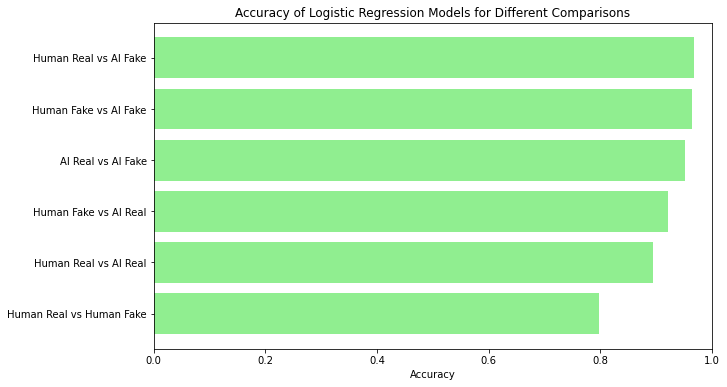

In [37]:
# Accuracy scores
accuracies_lr = [
    accuracy_score(y_test_hr_vs_mf, logistic_regression_predictions_hr_vs_mf),
    accuracy_score(y_test_hf_vs_mf, logistic_regression_predictions_hf_vs_mf),
    accuracy_score(y_test_mr_vs_mf, logistic_regression_predictions_mr_vs_mf),
    accuracy_score(y_test_hf_vs_mr, logistic_regression_predictions_hf_vs_mr),
    accuracy_score(y_test_hr_vs_mr, logistic_regression_predictions_hr_vs_mr),
    accuracy_score(y_test_hr_vs_hf, logistic_regression_predictions_hr_vs_hf)
]

# Comparison labels
comparisons_lr = [
    "Human Real vs AI Fake",
    "Human Fake vs AI Fake",
    "AI Real vs AI Fake",
    "Human Fake vs AI Real",
    "Human Real vs AI Real",
    "Human Real vs Human Fake"
]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(comparisons_lr, accuracies_lr, color='lightgreen')
plt.xlabel('Accuracy')
plt.title('Accuracy of Logistic Regression Models for Different Comparisons')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top
plt.show()

### Evaluation Metrics

It's important to evaluate precision, recall, and F1-score for each class because these metrics provide insights into the performance of the classification model beyond just overall accuracy. They are particularly useful when dealing with imbalanced datasets or when the costs of false positives and false negatives are different.

#### Precision
Precision measures the accuracy of positive predictions made by the model. It is the ratio of true positives (correctly predicted positive instances) to the total number of instances predicted as positive (true positives plus false positives). A high precision indicates that the model makes fewer false positive predictions.
Precison = True Positives / (True Positives + False Positives)

#### Recall
Recall measures the ability of the model to correctly identify positive instances from the total actual positives. It is the ratio of true positives to the total number of actual positive instances (true positives plus false negatives). A high recall indicates that the model captures most of the positive instances.
Recall = True Positives / (True Positives + False Negatives)

#### F1-score
F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, giving equal weight to both metrics. F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is useful when there is an uneven class distribution, as it considers both false positives and false negatives.
F1-score = 2 * (Precision * Recall) / (Precision + Recall)



In [29]:
from sklearn.metrics import classification_report

# Precision, recall, and F1-score for Human Real vs AI Fake
print("Classification Report - Human Real vs AI Fake:")
print(classification_report(y_test_hr_vs_mf, logistic_regression_predictions_hr_vs_mf, target_names=['Human Real', 'AI Fake']))

# Precision, recall, and F1-score for Human Fake vs AI Fake
print("Classification Report - Human Fake vs AI Fake:")
print(classification_report(y_test_hf_vs_mf, logistic_regression_predictions_hf_vs_mf, target_names=['Human Fake', 'AI Fake']))

# Precision, recall, and F1-score for AI Real vs AI Fake
print("Classification Report - AI Real vs AI Fake:")
print(classification_report(y_test_mr_vs_mf, logistic_regression_predictions_mr_vs_mf, target_names=['AI Real', 'AI Fake']))

# Precision, recall, and F1-score for Human Fake vs AI Real
print("Classification Report - Human Fake vs AI Real:")
print(classification_report(y_test_hf_vs_mr, logistic_regression_predictions_hf_vs_mr, target_names=['Human Fake', 'AI Real']))

# Precision, recall, and F1-score for Human Real vs AI Real
print("Classification Report - Human Real vs AI Real:")
print(classification_report(y_test_hr_vs_mr, logistic_regression_predictions_hr_vs_mr, target_names=['Human Real', 'AI Real']))

# Precision, recall, and F1-score for Human Real vs Human Fake
print("Classification Report - Human Real vs Human Fake:")
print(classification_report(y_test_hr_vs_hf, logistic_regression_predictions_hr_vs_hf, target_names=['Human Real', 'Human Fake']))

Classification Report - Human Real vs AI Fake:
              precision    recall  f1-score   support

  Human Real       0.96      0.98      0.97       840
     AI Fake       0.98      0.96      0.97       808

    accuracy                           0.97      1648
   macro avg       0.97      0.97      0.97      1648
weighted avg       0.97      0.97      0.97      1648

Classification Report - Human Fake vs AI Fake:
              precision    recall  f1-score   support

  Human Fake       0.96      0.97      0.96       804
     AI Fake       0.97      0.96      0.96       830

    accuracy                           0.96      1634
   macro avg       0.96      0.96      0.96      1634
weighted avg       0.96      0.96      0.96      1634

Classification Report - AI Real vs AI Fake:
              precision    recall  f1-score   support

     AI Real       0.94      0.97      0.95       850
     AI Fake       0.96      0.94      0.95       801

    accuracy                           0.95 

### Plot-Recall Curve

It plots the precision (positive predictive value) against the recall (true positive rate) for different threshold values.

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

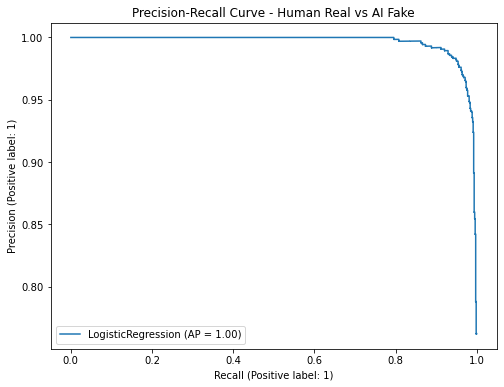

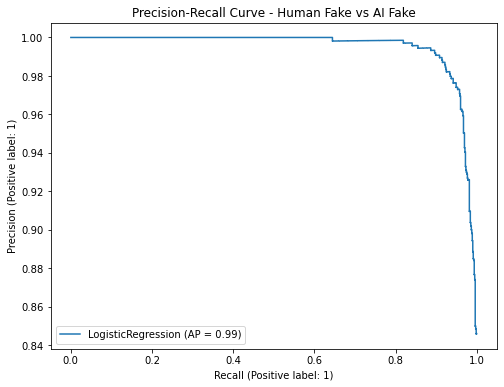

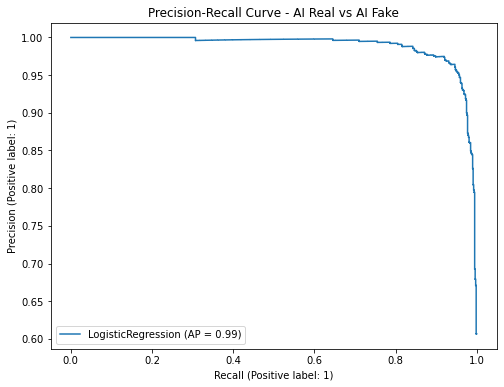

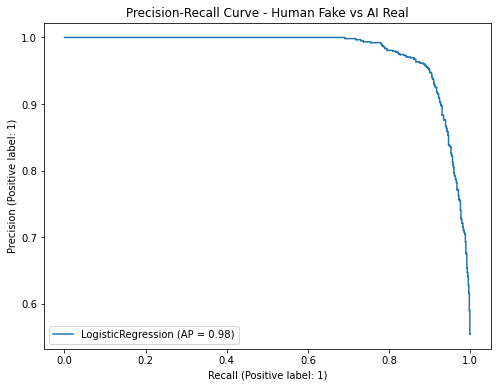

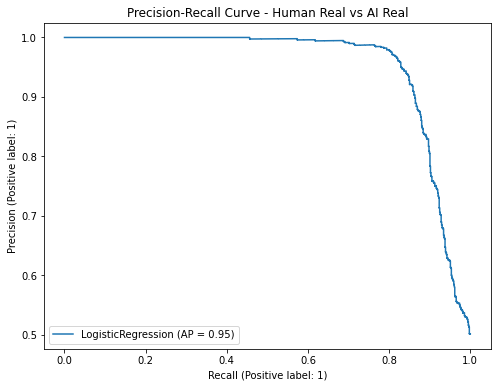

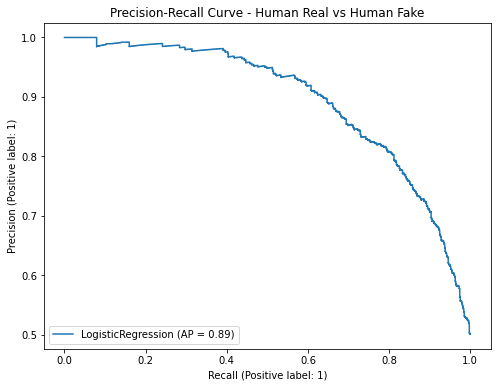

In [32]:
from sklearn.metrics import plot_precision_recall_curve

# Precision-Recall Curve for Human Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_hr_vs_mf, X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs AI Fake')
plt.show()

# Precision-Recall Curve for Human Fake vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_hf_vs_mf, X_test_hf_vs_mf_tfidf, y_test_hf_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Fake vs AI Fake')
plt.show()

# Precision-Recall Curve for AI Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_mr_vs_mf, X_test_mr_vs_mf_tfidf, y_test_mr_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - AI Real vs AI Fake')
plt.show()

# Precision-Recall Curve for Human Fake vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_hf_vs_mr, X_test_hf_vs_mr_tfidf, y_test_hf_vs_mr, ax=ax)
ax.set_title('Precision-Recall Curve - Human Fake vs AI Real')
plt.show()

# Precision-Recall Curve for Human Real vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_hr_vs_mr, X_test_hr_vs_mr_tfidf, y_test_hr_vs_mr, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs AI Real')
plt.show()

# Precision-Recall Curve for Human Real vs Human Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(logistic_regression_model_hr_vs_hf, X_test_hr_vs_hf_tfidf, y_test_hr_vs_hf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs Human Fake')
plt.show()

### Confusion Matrix Evaluation

#### Diagonal Dominance
The main diagonal of the confusion matrix represents the correct predictions (true positives and true negatives). A good confusion matrix will have high values along the diagonal, indicating that the model is making correct predictions for most instances.

#### Off-diagonal Values
Off-diagonal elements represent misclassifications. A good confusion matrix will have low values in the off-diagonal elements, indicating that the model is making fewer incorrect predictions.

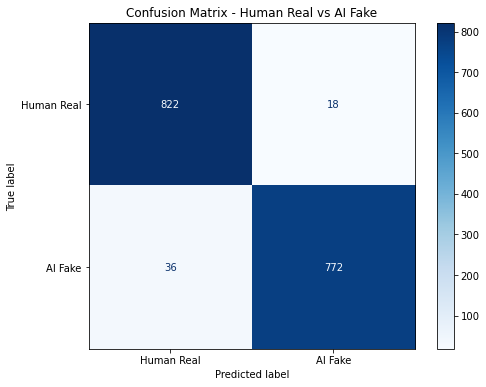

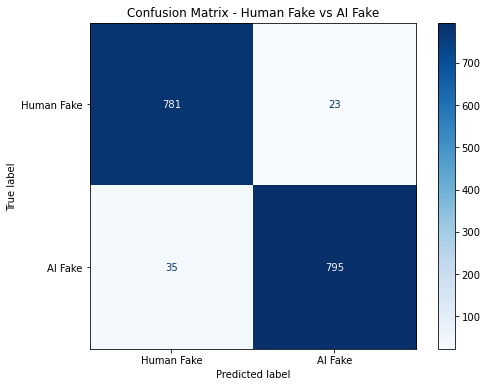

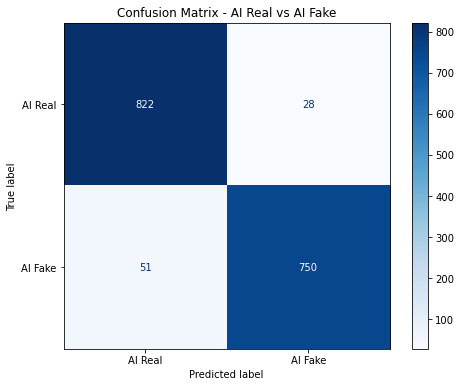

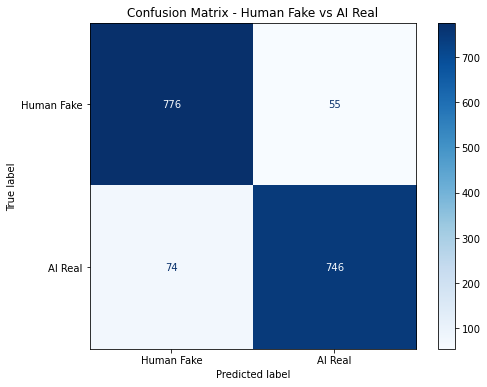

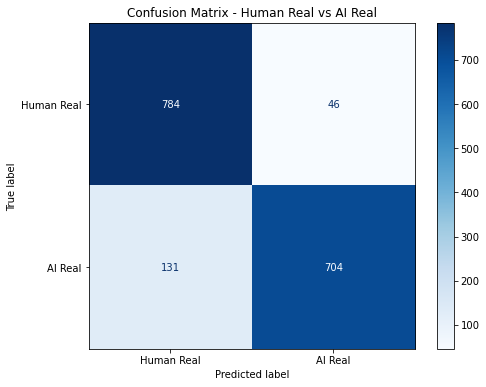

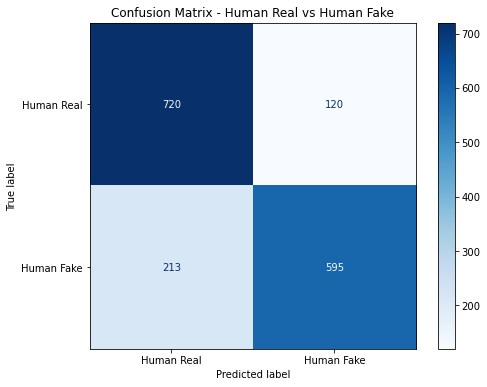

In [33]:
from sklearn.metrics import plot_confusion_matrix

# Confusion Matrix for Human Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_hr_vs_mf, X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Real', 'AI Fake'])
ax.set_title('Confusion Matrix - Human Real vs AI Fake')
plt.show()

# Confusion Matrix for Human Fake vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_hf_vs_mf, X_test_hf_vs_mf_tfidf, y_test_hf_vs_mf, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Fake', 'AI Fake'])
ax.set_title('Confusion Matrix - Human Fake vs AI Fake')
plt.show()

# Confusion Matrix for AI Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_mr_vs_mf, X_test_mr_vs_mf_tfidf, y_test_mr_vs_mf, ax=ax, cmap=plt.cm.Blues, display_labels=['AI Real', 'AI Fake'])
ax.set_title('Confusion Matrix - AI Real vs AI Fake')
plt.show()

# Confusion Matrix for Human Fake vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_hf_vs_mr, X_test_hf_vs_mr_tfidf, y_test_hf_vs_mr, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Fake', 'AI Real'])
ax.set_title('Confusion Matrix - Human Fake vs AI Real')
plt.show()

# Confusion Matrix for Human Real vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_hr_vs_mr, X_test_hr_vs_mr_tfidf, y_test_hr_vs_mr, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Real', 'AI Real'])
ax.set_title('Confusion Matrix - Human Real vs AI Real')
plt.show()

# Confusion Matrix for Human Real vs Human Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(logistic_regression_model_hr_vs_hf, X_test_hr_vs_hf_tfidf, y_test_hr_vs_hf, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Real', 'Human Fake'])
ax.set_title('Confusion Matrix - Human Real vs Human Fake')
plt.show()

### Receiver Operating Characteristic (ROC) Curve Evaluation

#### Area Under the Curve (AUC)
One of the primary metrics for evaluating a ROC curve is the AUC. A perfect classifier would have an AUC of 1, indicating perfect discrimination between positive and negative classes. Higher AUC values generally indicate better classifier performance.

#### Shape of the Curve
A good ROC curve typically rises steeply at the beginning and then gradually flattens out towards the top-left corner. A curve that hugs the top-left corner more closely indicates better performance.

#### Distance from the Random Guess Line
The ROC curve should be significantly above the diagonal line representing random guessing (the line connecting [0,0] and [1,1]). A ROC curve that closely follows the diagonal line suggests that the model performs no better than random guessing.

#### Trade-off between True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity): 
The ROC curve illustrates the trade-off between sensitivity (true positive rate) and specificity (true negative rate). Depending on the application, you may want to prioritize one over the other. A good ROC curve should strike a balance between sensitivity and specificity.

#### Youden's J statistic:
Youden's J statistic is calculated as (Sensitivity + Specificity - 1) and it represents the maximum potential effectiveness of a test. Maximizing this value helps in determining the optimal threshold.

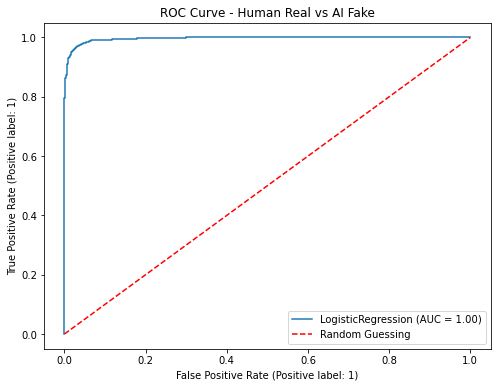

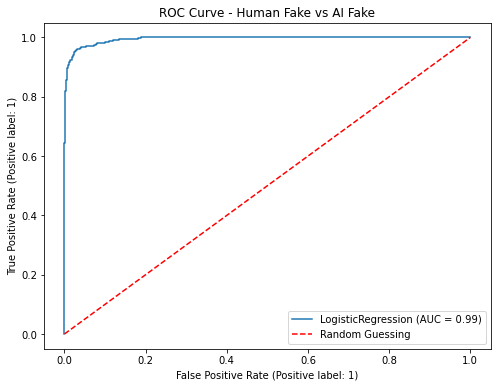

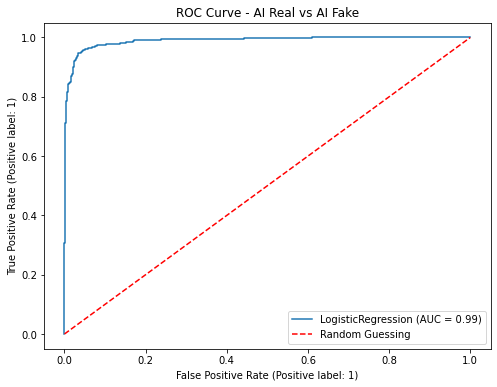

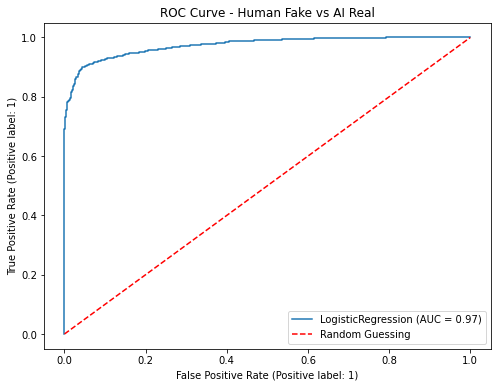

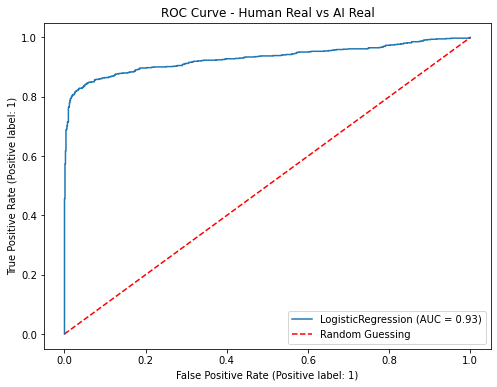

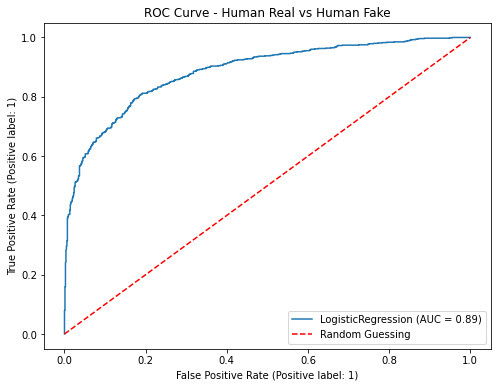

In [34]:
from sklearn.metrics import plot_roc_curve

# ROC Curve for Human Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_hr_vs_mf, X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for Human Fake vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_hf_vs_mf, X_test_hf_vs_mf_tfidf, y_test_hf_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Fake vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for AI Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_mr_vs_mf, X_test_mr_vs_mf_tfidf, y_test_mr_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - AI Real vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for Human Fake vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_hf_vs_mr, X_test_hf_vs_mr_tfidf, y_test_hf_vs_mr, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Fake vs AI Real')
plt.legend()
plt.show()

# ROC Curve for Human Real vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_hr_vs_mr, X_test_hr_vs_mr_tfidf, y_test_hr_vs_mr, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs AI Real')
plt.legend()
plt.show()

# ROC Curve for Human Real vs Human Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(logistic_regression_model_hr_vs_hf, X_test_hr_vs_hf_tfidf, y_test_hr_vs_hf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs Human Fake')
plt.legend()
plt.show()

### Naive Bayes Model

A Naive Bayes model is a probabilistic classifier based on Bayes' theorem with an assumption of independence between the features. It's called "naive" because it assumes that the presence of a particular feature in a class is independent of the presence of any other feature. Despite this simplifying assumption, Naive Bayes classifiers have been found to perform surprisingly well in many real-world situations, especially in text classification and spam filtering tasks.

In [35]:
# Naive Bayes models for each comparison
naive_bayes_model_hr_vs_mf = MultinomialNB()
naive_bayes_model_hr_vs_mf.fit(X_train_hr_vs_mf_tfidf, y_train_hr_vs_mf)

naive_bayes_model_hf_vs_mf = MultinomialNB()
naive_bayes_model_hf_vs_mf.fit(X_train_hf_vs_mf_tfidf, y_train_hf_vs_mf)

naive_bayes_model_mr_vs_mf = MultinomialNB()
naive_bayes_model_mr_vs_mf.fit(X_train_mr_vs_mf_tfidf, y_train_mr_vs_mf)

naive_bayes_model_hf_vs_mr = MultinomialNB()
naive_bayes_model_hf_vs_mr.fit(X_train_hf_vs_mr_tfidf, y_train_hf_vs_mr)

naive_bayes_model_hr_vs_mr = MultinomialNB()
naive_bayes_model_hr_vs_mr.fit(X_train_hr_vs_mr_tfidf, y_train_hr_vs_mr)

naive_bayes_model_hr_vs_hf = MultinomialNB()
naive_bayes_model_hr_vs_hf.fit(X_train_hr_vs_hf_tfidf, y_train_hr_vs_hf)

# Predictions for each comparison
naive_bayes_predictions_hr_vs_mf = naive_bayes_model_hr_vs_mf.predict(X_test_hr_vs_mf_tfidf)
naive_bayes_predictions_hf_vs_mf = naive_bayes_model_hf_vs_mf.predict(X_test_hf_vs_mf_tfidf)
naive_bayes_predictions_mr_vs_mf = naive_bayes_model_mr_vs_mf.predict(X_test_mr_vs_mf_tfidf)
naive_bayes_predictions_hf_vs_mr = naive_bayes_model_hf_vs_mr.predict(X_test_hf_vs_mr_tfidf)
naive_bayes_predictions_hr_vs_mr = naive_bayes_model_hr_vs_mr.predict(X_test_hr_vs_mr_tfidf)
naive_bayes_predictions_hr_vs_hf = naive_bayes_model_hr_vs_hf.predict(X_test_hr_vs_hf_tfidf)

# Evaluate Naive Bayes models for each comparison
print("Naive Bayes Accuracy for Human Real vs AI Fake:", accuracy_score(y_test_hr_vs_mf, naive_bayes_predictions_hr_vs_mf))
print("Naive Bayes Accuracy for Human Fake vs AI Fake:", accuracy_score(y_test_hf_vs_mf, naive_bayes_predictions_hf_vs_mf))
print("Naive Bayes Accuracy for AI Real vs AI Fake:", accuracy_score(y_test_mr_vs_mf, naive_bayes_predictions_mr_vs_mf))
print("Naive Bayes Accuracy for Human Fake vs AI Real:", accuracy_score(y_test_hf_vs_mr, naive_bayes_predictions_hf_vs_mr))
print("Naive Bayes Accuracy for Human Real vs AI Real:", accuracy_score(y_test_hr_vs_mr, naive_bayes_predictions_hr_vs_mr))
print("Naive Bayes Accuracy for Human Real vs Human Fake:", accuracy_score(y_test_hr_vs_hf, naive_bayes_predictions_hr_vs_hf))

Naive Bayes Accuracy for Human Real vs AI Fake: 0.9478155339805825
Naive Bayes Accuracy for Human Fake vs AI Fake: 0.9485924112607099
Naive Bayes Accuracy for AI Real vs AI Fake: 0.8964264082374318
Naive Bayes Accuracy for Human Fake vs AI Real: 0.8921865536038764
Naive Bayes Accuracy for Human Real vs AI Real: 0.8822822822822823
Naive Bayes Accuracy for Human Real vs Human Fake: 0.7815533980582524


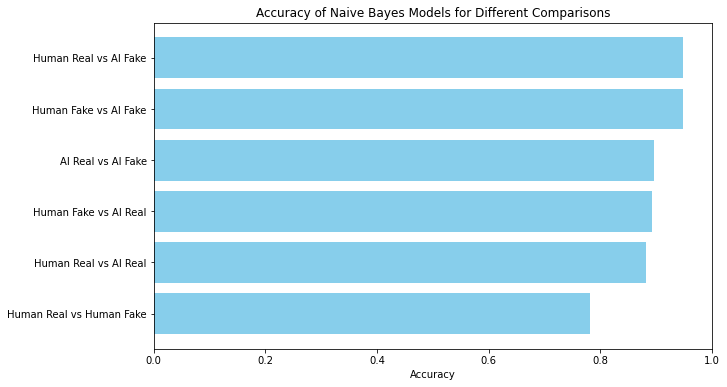

In [36]:
# Accuracy scores
accuracies = [
    accuracy_score(y_test_hr_vs_mf, naive_bayes_predictions_hr_vs_mf),
    accuracy_score(y_test_hf_vs_mf, naive_bayes_predictions_hf_vs_mf),
    accuracy_score(y_test_mr_vs_mf, naive_bayes_predictions_mr_vs_mf),
    accuracy_score(y_test_hf_vs_mr, naive_bayes_predictions_hf_vs_mr),
    accuracy_score(y_test_hr_vs_mr, naive_bayes_predictions_hr_vs_mr),
    accuracy_score(y_test_hr_vs_hf, naive_bayes_predictions_hr_vs_hf)
]

# Comparison labels
comparisons = [
    "Human Real vs AI Fake",
    "Human Fake vs AI Fake",
    "AI Real vs AI Fake",
    "Human Fake vs AI Real",
    "Human Real vs AI Real",
    "Human Real vs Human Fake"
]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(comparisons, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Naive Bayes Models for Different Comparisons')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top
plt.show()

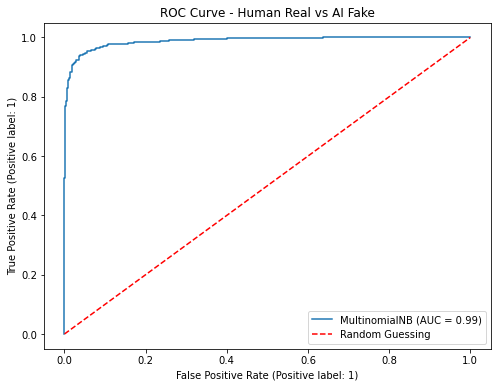

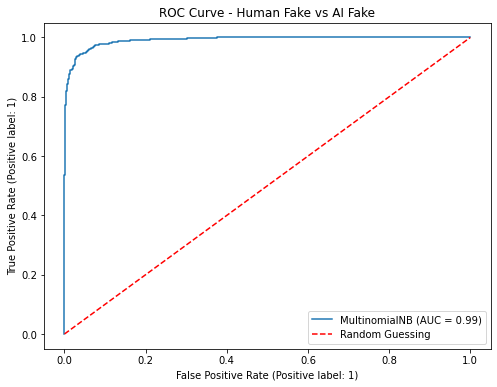

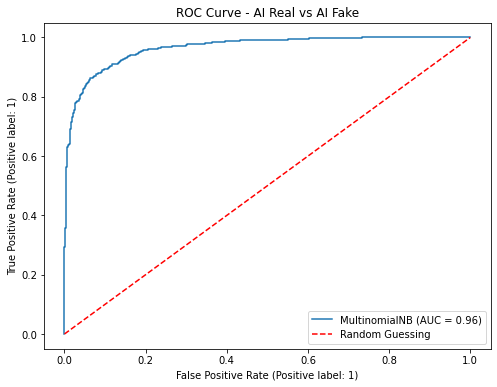

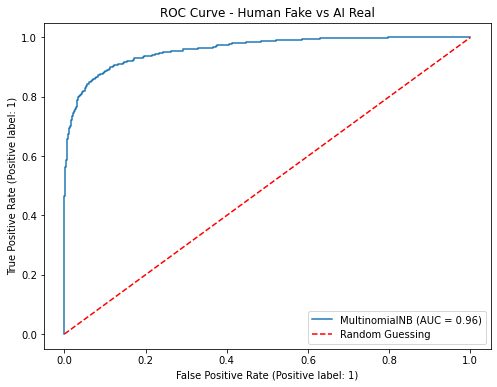

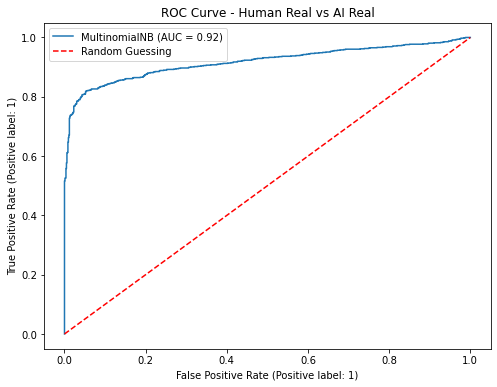

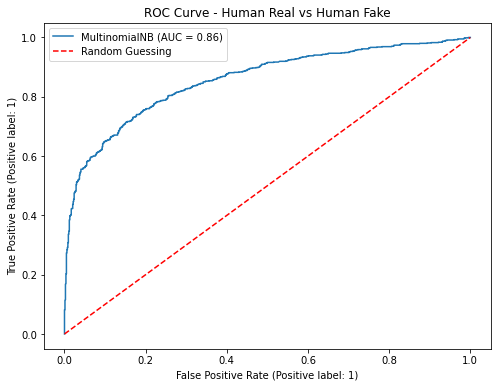

In [39]:
from sklearn.metrics import plot_roc_curve

# ROC Curve for Human Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_hr_vs_mf, X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for Human Fake vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_hf_vs_mf, X_test_hf_vs_mf_tfidf, y_test_hf_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Fake vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for AI Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_mr_vs_mf, X_test_mr_vs_mf_tfidf, y_test_mr_vs_mf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - AI Real vs AI Fake')
plt.legend()
plt.show()

# ROC Curve for Human Fake vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_hf_vs_mr, X_test_hf_vs_mr_tfidf, y_test_hf_vs_mr, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Fake vs AI Real')
plt.legend()
plt.show()

# ROC Curve for Human Real vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_hr_vs_mr, X_test_hr_vs_mr_tfidf, y_test_hr_vs_mr, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs AI Real')
plt.legend()
plt.show()

# ROC Curve for Human Real vs Human Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_roc_curve(naive_bayes_model_hr_vs_hf, X_test_hr_vs_hf_tfidf, y_test_hr_vs_hf, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
ax.set_title('ROC Curve - Human Real vs Human Fake')
plt.legend()
plt.show()

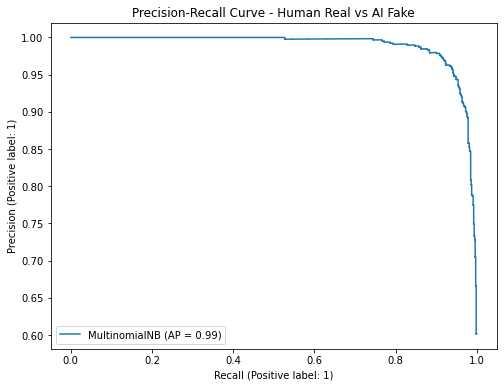

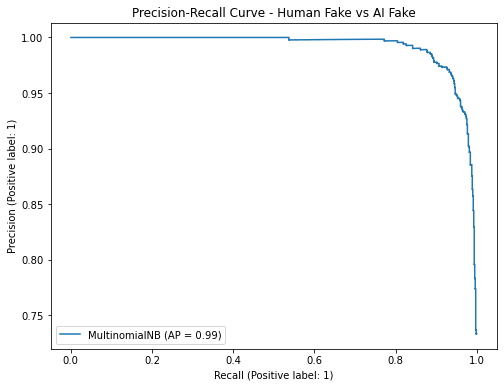

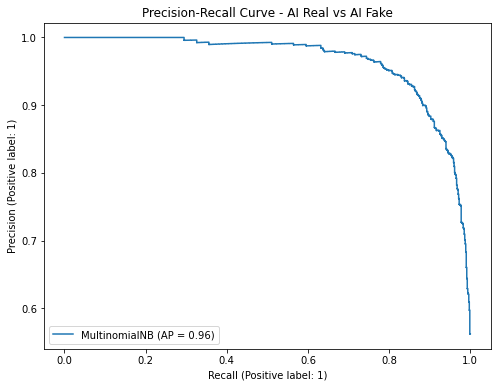

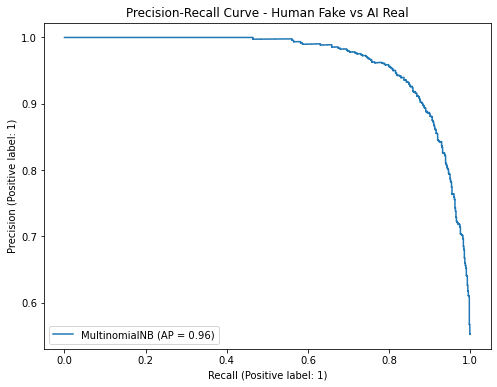

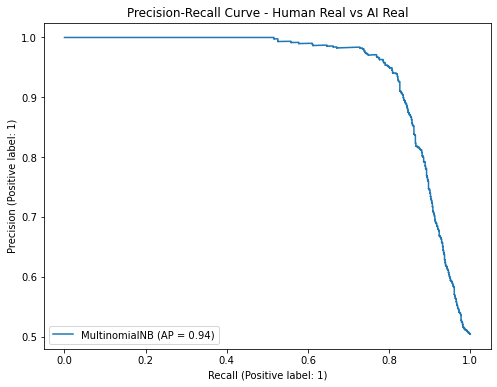

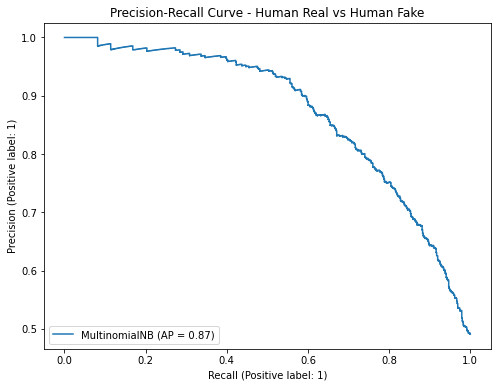

In [40]:
from sklearn.metrics import plot_precision_recall_curve

# Precision-Recall Curve for Human Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_hr_vs_mf, X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs AI Fake')
plt.show()

# Precision-Recall Curve for Human Fake vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_hf_vs_mf, X_test_hf_vs_mf_tfidf, y_test_hf_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Fake vs AI Fake')
plt.show()

# Precision-Recall Curve for AI Real vs AI Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_mr_vs_mf, X_test_mr_vs_mf_tfidf, y_test_mr_vs_mf, ax=ax)
ax.set_title('Precision-Recall Curve - AI Real vs AI Fake')
plt.show()

# Precision-Recall Curve for Human Fake vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_hf_vs_mr, X_test_hf_vs_mr_tfidf, y_test_hf_vs_mr, ax=ax)
ax.set_title('Precision-Recall Curve - Human Fake vs AI Real')
plt.show()

# Precision-Recall Curve for Human Real vs AI Real
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_hr_vs_mr, X_test_hr_vs_mr_tfidf, y_test_hr_vs_mr, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs AI Real')
plt.show()

# Precision-Recall Curve for Human Real vs Human Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(naive_bayes_model_hr_vs_hf, X_test_hr_vs_hf_tfidf, y_test_hr_vs_hf, ax=ax)
ax.set_title('Precision-Recall Curve - Human Real vs Human Fake')
plt.show()

### Support Vector Machine (SVM)

#### Classification Objective: 
The primary objective of SVM is to find the optimal hyperplane that best separates the data points into different classes. In a binary classification scenario, this hyperplane is a decision boundary that maximizes the margin between the classes.

#### Margin Maximization: 
SVM aims to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class, known as support vectors. Maximizing this margin helps improve the generalization ability of the model, as it reduces the chances of misclassification on unseen data.

#### Regularization: 
SVM includes a regularization parameter (often denoted as C) that controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C encourages a larger margin, potentially leading to a simpler model with higher bias and lower variance, while a larger value of C allows more flexibility in fitting the training data, potentially leading to a more complex model with lower bias and higher variance.

#### Robust to Overfitting: 
SVMs aim to maximize the margin between classes, which helps in generalizing well to unseen data. This margin maximization reduces the risk of overfitting, making SVMs robust in handling noisy data and complex decision boundaries.

#### Works well with Sparse Data: 
Text data often results in sparse feature vectors, where most dimensions are zero (indicating absence of a term). SVMs can handle sparse data efficiently, making them suitable for text classification tasks where the feature space can be large and sparse.

### Things to know about SVM models:

#### Kernel Selection: 
The choice of kernel function (e.g., linear, polynomial, radial basis function) can significantly impact the SVM's performance. The appropriate kernel should be selected based on the dataset characteristics and the problem at hand.

#### Hyperparameter Tuning: 
SVMs have hyperparameters such as the regularization parameter (C) and kernel parameters (e.g., gamma for RBF kernel) that need to be tuned for optimal performance. Cross-validation techniques are often used to find the best combination of hyperparameters.

#### Scalability: 
SVMs can be less scalable compared to some other algorithms, especially when dealing with large datasets. However, efficient implementations and optimization techniques are available to handle scalability issues to some extent.

In [41]:
from sklearn.svm import SVC

In [42]:
# SVM models for each comparison
svm_model_hr_vs_mf = SVC(kernel='linear')
svm_model_hr_vs_mf.fit(X_train_hr_vs_mf_tfidf, y_train_hr_vs_mf)

svm_model_hf_vs_mf = SVC(kernel='linear')
svm_model_hf_vs_mf.fit(X_train_hf_vs_mf_tfidf, y_train_hf_vs_mf)

svm_model_mr_vs_mf = SVC(kernel='linear')
svm_model_mr_vs_mf.fit(X_train_mr_vs_mf_tfidf, y_train_mr_vs_mf)

svm_model_hf_vs_mr = SVC(kernel='linear')
svm_model_hf_vs_mr.fit(X_train_hf_vs_mr_tfidf, y_train_hf_vs_mr)

svm_model_hr_vs_mr = SVC(kernel='linear')
svm_model_hr_vs_mr.fit(X_train_hr_vs_mr_tfidf, y_train_hr_vs_mr)

svm_model_hr_vs_hf = SVC(kernel='linear')
svm_model_hr_vs_hf.fit(X_train_hr_vs_hf_tfidf, y_train_hr_vs_hf)

# Predictions for each comparison
svm_predictions_hr_vs_mf = svm_model_hr_vs_mf.predict(X_test_hr_vs_mf_tfidf)
svm_predictions_hf_vs_mf = svm_model_hf_vs_mf.predict(X_test_hf_vs_mf_tfidf)
svm_predictions_mr_vs_mf = svm_model_mr_vs_mf.predict(X_test_mr_vs_mf_tfidf)
svm_predictions_hf_vs_mr = svm_model_hf_vs_mr.predict(X_test_hf_vs_mr_tfidf)
svm_predictions_hr_vs_mr = svm_model_hr_vs_mr.predict(X_test_hr_vs_mr_tfidf)
svm_predictions_hr_vs_hf = svm_model_hr_vs_hf.predict(X_test_hr_vs_hf_tfidf)

# Evaluate SVM models for each comparison
print("SVM Accuracy for Human Real vs AI Fake:", accuracy_score(y_test_hr_vs_mf, svm_predictions_hr_vs_mf))
print("SVM Accuracy for Human Fake vs AI Fake:", accuracy_score(y_test_hf_vs_mf, svm_predictions_hf_vs_mf))
print("SVM Accuracy for AI Real vs AI Fake:", accuracy_score(y_test_mr_vs_mf, svm_predictions_mr_vs_mf))
print("SVM Accuracy for Human Fake vs AI Real:", accuracy_score(y_test_hf_vs_mr, svm_predictions_hf_vs_mr))
print("SVM Accuracy for Human Real vs AI Real:", accuracy_score(y_test_hr_vs_mr, svm_predictions_hr_vs_mr))
print("SVM Accuracy for Human Real vs Human Fake:", accuracy_score(y_test_hr_vs_hf, svm_predictions_hr_vs_hf))

SVM Accuracy for Human Real vs AI Fake: 0.9769417475728155
SVM Accuracy for Human Fake vs AI Fake: 0.9657282741738066
SVM Accuracy for AI Real vs AI Fake: 0.9636583888552392
SVM Accuracy for Human Fake vs AI Real: 0.9267110841913991
SVM Accuracy for Human Real vs AI Real: 0.8948948948948949
SVM Accuracy for Human Real vs Human Fake: 0.7949029126213593
